In [43]:

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.3.0
3.4.2


In [45]:
from ema_workbench import (
    Policy,
    ema_logging,
    MultiprocessingEvaluator,
)
from problem_formulation import get_model_for_problem_formulation



In [46]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [47]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [48]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [49]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x00000166B349FF40>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x00000166B349FF40>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x00000166B349FF40>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x00000166B349FF40>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x00000166B349FF40>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x00000166B349FF40>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [50]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:06<00:00, 30.87it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [51]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,88,87.985433,1.5,0.289900,123.571553,1.0,0.899764,274.615833,1.0,0.959404,...,4,4,10,9,9,10,0,158,154,dikesnet
1,124,193.497495,1.0,0.245207,141.447811,10.0,0.306523,226.334180,10.0,0.180615,...,4,4,10,9,9,10,0,159,154,dikesnet
2,73,98.084480,1.5,0.934768,211.314472,1.0,0.475096,212.262791,10.0,0.356581,...,4,4,10,9,9,10,0,160,154,dikesnet
3,111,315.836266,1.0,0.610468,135.152912,10.0,0.552025,54.005562,1.0,0.323065,...,4,4,10,9,9,10,0,161,154,dikesnet
4,100,148.144241,10.0,0.164586,162.485853,10.0,0.753538,234.096448,1.5,0.899622,...,4,4,10,9,9,10,0,162,154,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,102,35.924574,1.5,0.341192,307.868699,1.5,0.992263,186.805662,1.5,0.854407,...,6,0,0,6,0,5,3,203,157,dikesnet
196,64,212.549920,1.0,0.797080,155.261208,1.5,0.537486,298.023638,1.0,0.983667,...,6,0,0,6,0,5,3,204,157,dikesnet
197,96,230.298720,1.0,0.318686,327.244252,10.0,0.976960,165.628164,1.0,0.759004,...,6,0,0,6,0,5,3,205,157,dikesnet
198,105,64.142773,10.0,0.132177,340.606679,1.0,0.725145,133.081884,1.5,0.519830,...,6,0,0,6,0,5,3,206,157,dikesnet


In [52]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,2.244050e+08,0.0,2.701191e+08,0.0,7.802681e+07,0.002775,4.745578e+07,0.000000,2.314975e+08,0.000000,1.018700e+09,0.000000
1,2.244050e+08,0.0,2.701191e+08,0.0,2.318559e+08,0.389804,4.745578e+07,0.000000,2.314975e+08,0.000000,1.018700e+09,0.000000
2,2.244050e+08,0.0,2.701191e+08,0.0,1.195017e+08,0.091817,4.745578e+07,0.000000,2.314975e+08,0.000000,1.018700e+09,0.000000
3,2.244050e+08,0.0,2.701191e+08,0.0,1.190780e+08,0.090291,4.829866e+07,0.000469,2.314975e+08,0.000000,1.018700e+09,0.000000
4,2.244050e+08,0.0,2.701191e+08,0.0,8.038609e+07,0.009209,4.745578e+07,0.000000,2.314975e+08,0.000000,1.018700e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.105337e+08,0.0,5.335857e+07,0.0,3.728504e+07,0.000000,1.258646e+07,0.000000,8.514240e+07,0.000000,1.195400e+09,0.000000
196,2.105337e+08,0.0,5.335857e+07,0.0,3.728504e+07,0.000000,1.258646e+07,0.000000,8.514240e+07,0.000000,1.195400e+09,0.000000
197,2.105337e+08,0.0,5.335857e+07,0.0,3.728504e+07,0.000000,1.258646e+07,0.000000,8.514240e+07,0.000000,1.195400e+09,0.000000
198,2.105337e+08,0.0,5.335857e+07,0.0,3.728504e+07,0.000000,1.258646e+07,0.000000,8.944354e+07,0.000467,1.195400e+09,259.850692


In [53]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [54]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:10<00:00, 29.34it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [55]:
experiments, outcomes = results

In [56]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.000000,9.248491e+07,0.078680,0.000000e+00,0.000000,1.609589e+08,0.062340,2.416830e+07,0.019144,253800000.0,0.0
1,5.397251e+07,0.000000,1.413446e+07,0.014500,6.131989e+07,0.116669,4.224590e+07,0.021129,9.449173e+08,0.837729,253800000.0,0.0
2,5.397251e+07,0.000000,4.557820e+08,0.332649,1.166859e+09,1.615246,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
3,5.397251e+07,0.000000,1.112287e+08,0.079248,1.298143e+09,1.682928,5.654702e+06,0.001936,0.000000e+00,0.000000,253800000.0,0.0
4,5.397251e+07,0.000000,4.029972e+07,0.050392,1.009840e+09,2.246379,2.175649e+07,0.011810,0.000000e+00,0.000000,253800000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000e+00,0.000000,1.734590e+06,0.002383,2.879840e+07,0.000000,3.091631e+06,0.002395,7.202912e+07,0.090920,369700000.0,0.0
296,0.000000e+00,0.000000,1.596313e+08,0.153199,2.879840e+07,0.000000,5.416073e+06,0.002790,0.000000e+00,0.000000,369700000.0,0.0
297,1.952624e+09,1.243568,4.649050e+07,0.041818,2.879840e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,369700000.0,0.0
298,5.105837e+07,0.026877,2.853071e+07,0.021810,2.879840e+07,0.000000,1.432852e+08,0.045196,1.008220e+08,0.069749,369700000.0,0.0


[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 300 points remaining, containing 231 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.54, coverage: 0.7012987012987013, density: 1.0 restricted_dimensions: 2


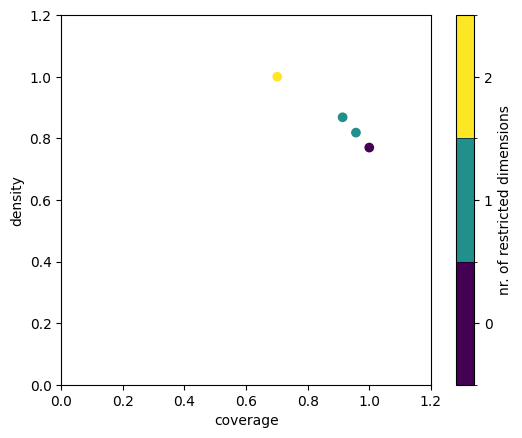

In [74]:
from ema_workbench.analysis import prim

cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)
x = cleaned_experiments

y= results['A.1 Total Costs']
y= y> np.percentile(y, 10)

prim_alg = prim.Prim(x, y, threshold=0.3, peel_alpha= 0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

(this is a bad draft, just getting my thoughts on paper)
Once we have run the model, we can do scenario discovery using PRIM. This will select a limited number of experiments out of the 1000 runs we made to further analyse, based on criteria we choose. (do we clean first? unsure, running PRIM without first to check)

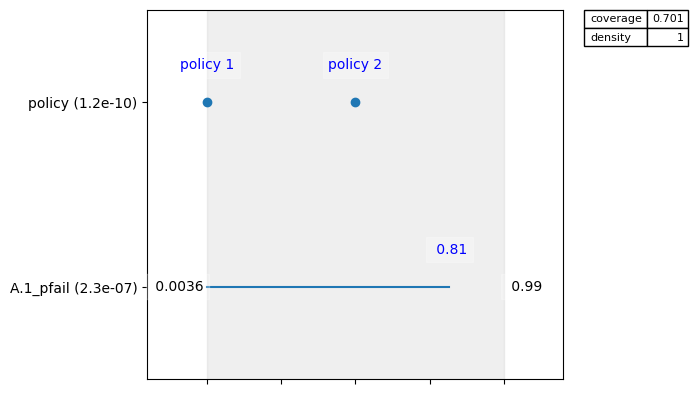

In [75]:
box1.inspect(style='graph')
plt.show()